In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn import * 

In [5]:
df = pd.read_csv("/data/Combined_Cycle_Power_Plant.csv")
df.head()

,AT,V,AP,RH,EP
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [9]:
target = "EP"
X = df.copy()
del X[target]
X_dummy = pd.get_dummies(X)
y = np.log(df[target])
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_dummy,
                            y, test_size = 0.3, random_state = 1)

pipe = pipeline.Pipeline([
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LinearRegression())
])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
r2_score = metrics.r2_score(y_train, y_train_pred)
print("Train rmse", rmse, "test r2_score", r2_score)

y_test_pred = pipe.predict(X_test)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
r2_score = metrics.r2_score(y_test, y_test_pred)
print("Test rmse", rmse, "test r2_score", r2_score)

Train rmse 0.009893208284754528 test r2_score 0.9298928647544801
Test rmse 0.009941231664114078 test r2_score 0.9294444312957376


In [10]:
import seaborn as sns

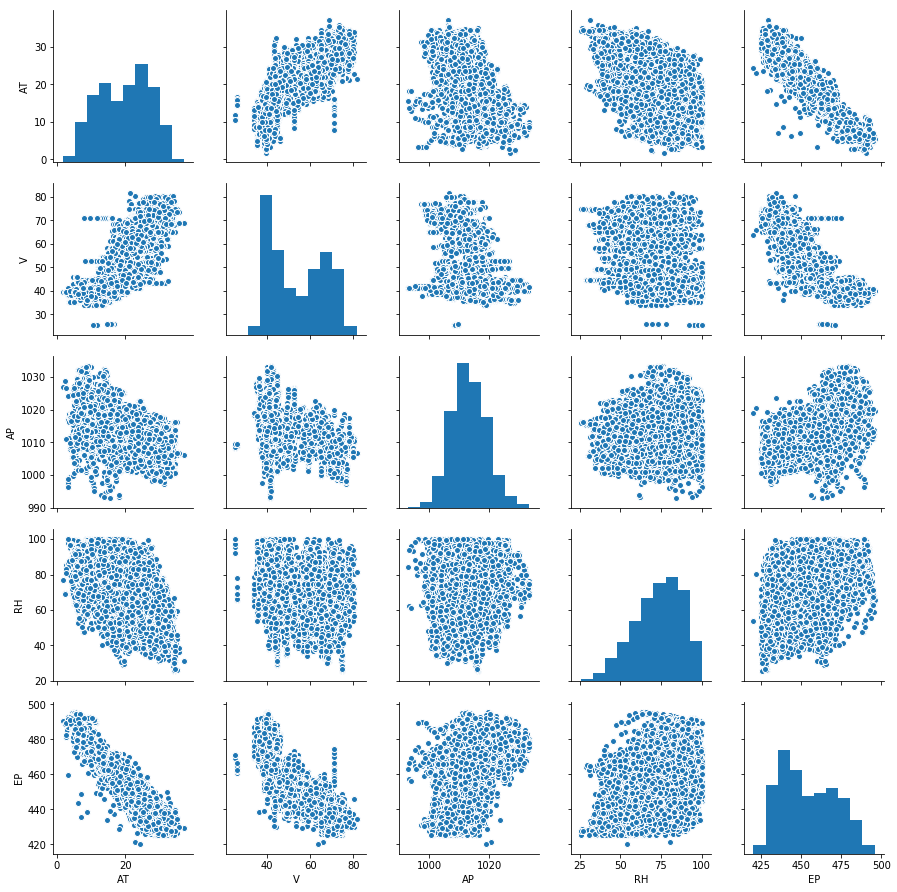

In [11]:
sns.pairplot(df)

In [12]:
target = "EP"
X = df.copy()
del X[target]

X["V2"] = X.V ** 2
X_dummy = pd.get_dummies(X)

y = np.log(df[target])
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_dummy,
                            y, test_size = 0.3, random_state = 1)

pipe = pipeline.Pipeline([
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LinearRegression())
])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
r2_score = metrics.r2_score(y_train, y_train_pred)
print("Train rmse", rmse, "test r2_score", r2_score)

y_test_pred = pipe.predict(X_test)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
r2_score = metrics.r2_score(y_test, y_test_pred)
print("Test rmse", rmse, "test r2_score", r2_score)

Train rmse 0.009820012250067782 test r2_score 0.9309264184658597
Test rmse 0.009863085363895316 test r2_score 0.9305493216935578


In [14]:
target = "EP"
X = df.copy()
del X[target]

X["V2"] = X.V ** 2
X["V3"] = X.V ** 3
X_dummy = pd.get_dummies(X)

y = np.log(df[target])
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_dummy,
                            y, test_size = 0.3, random_state = 1)

pipe = pipeline.Pipeline([
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LinearRegression())
])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
r2_score = metrics.r2_score(y_train, y_train_pred)
print("Train rmse", rmse, "test r2_score", r2_score)

y_test_pred = pipe.predict(X_test)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
r2_score = metrics.r2_score(y_test, y_test_pred)
print("Test rmse", rmse, "test r2_score", r2_score)

Train rmse 0.009787817221368806 test r2_score 0.931378593160392
Test rmse 0.009834100918532495 test r2_score 0.930956908478309


In [53]:
target = "EP"
X = df.copy()
del X[target]

X_dummy = pd.get_dummies(X)

y = np.log(df[target])
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_dummy,
                            y, test_size = 0.3, random_state = 1234)

pipe = pipeline.Pipeline([
    ("scaler", preprocessing.StandardScaler()),
    ("poly", preprocessing.PolynomialFeatures(degree = 5, include_bias=False)),
    ("est", linear_model.LinearRegression())
])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
r2_score = metrics.r2_score(y_train, y_train_pred)
print("Train rmse", rmse, "test r2_score", r2_score)

y_test_pred = pipe.predict(X_test)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
r2_score = metrics.r2_score(y_test, y_test_pred)
print("Test rmse", rmse, "test r2_score", r2_score)

Train rmse 0.008727978020286924 test r2_score 0.945151310632134
Test rmse 0.008757257520726147 test r2_score 0.9458934013639756


In [19]:
poly = preprocessing.PolynomialFeatures(degree=3, include_bias=False)
a = np.array([
    [1, 3, 0],
    [3, 0, 2],
    [4, -1, 4],
    [4, 6, -2]
])

poly.fit(a)
pd.DataFrame(poly.transform(a))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.0,3.0,0.0,1.0,3.0,0.0,9.0,0.0,0.0,1.0,3.0,0.0,9.0,0.0,0.0,27.0,0.0,0.0,0.0
1,3.0,0.0,2.0,9.0,0.0,6.0,0.0,0.0,4.0,27.0,0.0,18.0,0.0,0.0,12.0,0.0,0.0,0.0,8.0
2,4.0,-1.0,4.0,16.0,-4.0,16.0,1.0,-4.0,16.0,64.0,-16.0,64.0,4.0,-16.0,64.0,-1.0,4.0,-16.0,64.0
3,4.0,6.0,-2.0,16.0,24.0,-8.0,36.0,-12.0,4.0,64.0,96.0,-32.0,144.0,-48.0,16.0,216.0,-72.0,24.0,-8.0


In [52]:
np.random.seed(1)
np.random.random(5)

array([4.17022005e-01, 7.20324493e-01, 1.14374817e-04, 3.02332573e-01,
       1.46755891e-01])